# Congressional Record and Hansard Word Embeddings Analysis


This notebook cotains the code to create a variety of different word embeddings from the Congressional Record and Hansard. Word embeddings are used to investigate the following hypotheses:

- Hypothesis 1 a): Labour and Conservative politicians use more similar language to discuss climate change than they do in general.
- Hypothesis 1 b): The langauge used by Labour and Conservative politicians to discuss climate change has become more similar over time.
- Hypothesis 2: Democrat and Republican politicians use less similar langauage to discuss climate change than they do in general.
- Hypothesis 4: Democrat and Republican politicians use less similar language to discuss climate change than Labour and Conservative politicians.

Word embeddings are generated using the pre-trained `all-MiniLM-L6-v2` model from sentence-transformers.


## Setup


In [26]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

plt.style.use('ggplot')

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

congressional_record = pd.read_csv(
    DATA_PATH + 'non_procedural_congressional_record.csv')
hansard = pd.read_csv(DATA_PATH + 'non_procedural_hansard.csv')

climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

## Generating word embeddings


### Embedding the Congressional Record and Hansard


**Embedding the Congressional Record**


In [4]:
cleaned_stems = congressional_record['cleaned_stems'].tolist()
congressional_record_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'congressional_record_embeddings.npy',
        congressional_record_embeddings)

Batches: 100%|██████████| 2002/2002 [08:37<00:00,  3.87it/s]


**Embedding Hansard**


In [5]:
cleaned_stems = hansard['cleaned_stems'].tolist()
hansard_embeddings = model.encode(cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'hansard_embeddings.npy', hansard_embeddings)

Batches: 100%|██████████| 3153/3153 [03:15<00:00, 16.13it/s]


### Embedding the Climate Congressional Record and Climate Hansard datasets


**Embedding the Congressional Record**


In [6]:
cleaned_stems = climate_congressional_record['cleaned_stems'].tolist()
climate_congressional_record_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'climate_congressional_record_embeddings.npy',
        climate_congressional_record_embeddings)

Batches: 100%|██████████| 40/40 [00:04<00:00,  8.73it/s]


**Embedding Hansard**


In [7]:
cleaned_stems = climate_hansard['cleaned_stems'].tolist()
climate_hansard_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'climate_hansard_embeddings.npy',
        climate_hansard_embeddings)

Batches: 100%|██████████| 198/198 [00:11<00:00, 16.73it/s]


## UMAP Visualisation


These visualisations are primarily exploratory. However, they also give some insight into Hypotheses 1a) and 2 by comparing the similarity of language used by Labour and Conservative politicians and Democrat and Republican politicians respectively.


In [3]:
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')

congressional_record_embeddings = np.load(
    DATA_PATH + 'congressional_record_embeddings.npy')
hansard_embeddings = np.load(DATA_PATH + 'hansard_embeddings.npy')

climate_congressional_record_embeddings = np.load(
    DATA_PATH + 'climate_congressional_record_embeddings.npy')
climate_hansard_embeddings = np.load(
    DATA_PATH + 'climate_hansard_embeddings.npy')

### Visualising the Congressional Record and Hansard embeddings


In [23]:
umap_congressional_record_embeddings = umap_model.fit_transform(
    congressional_record_embeddings)
umap_hansard_embeddings = umap_model.fit_transform(hansard_embeddings)

**Congressional Record versus Hansard**


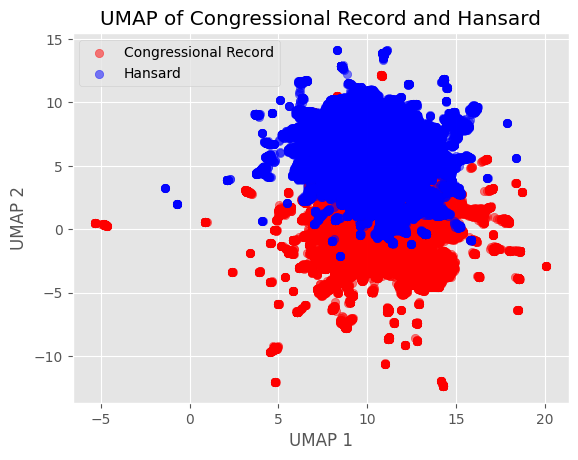

In [24]:
plt.scatter(umap_congressional_record_embeddings[:, 0],
            umap_congressional_record_embeddings[:, 1], alpha=0.5, c='red', label='Congressional Record')
plt.scatter(umap_hansard_embeddings[:, 0],
            umap_hansard_embeddings[:, 1], alpha=0.5, c='blue', label='Hansard')
plt.title('UMAP of Congressional Record and Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Democrat versus Republican**


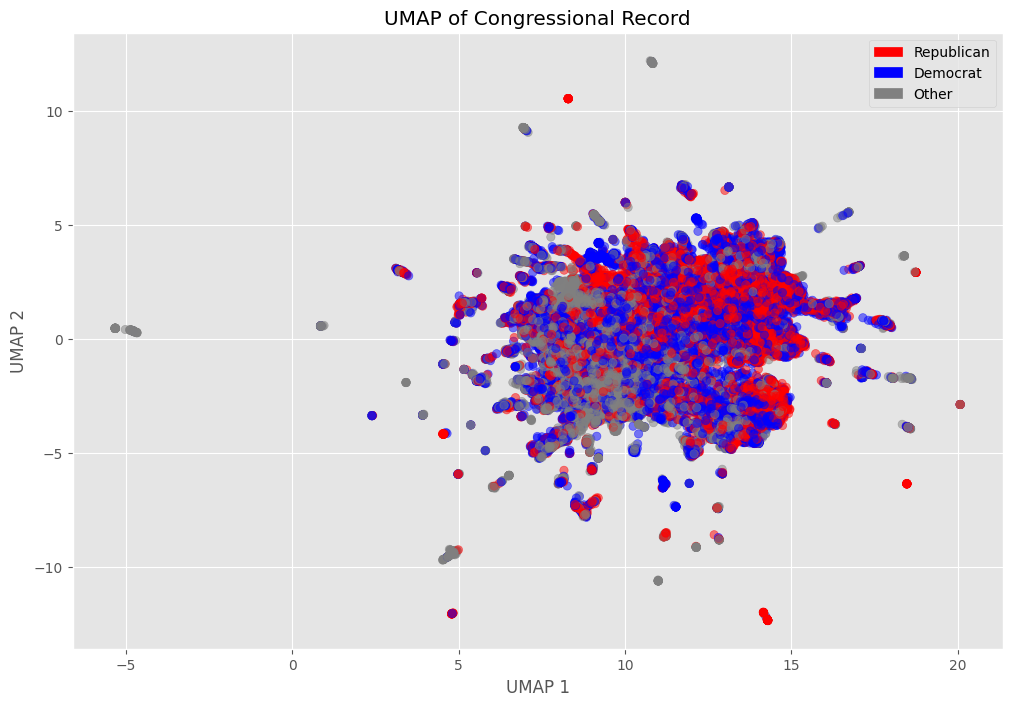

In [29]:
party_colours = {
    'R': 'red',
    'D': 'blue',
}
default_colour = 'grey'
colours = congressional_record['party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_congressional_record_embeddings[:, 0],
            umap_congressional_record_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Congressional Record')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Republican'),
    mpatches.Patch(color='blue', label='Democrat'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Labour versus Conservative**


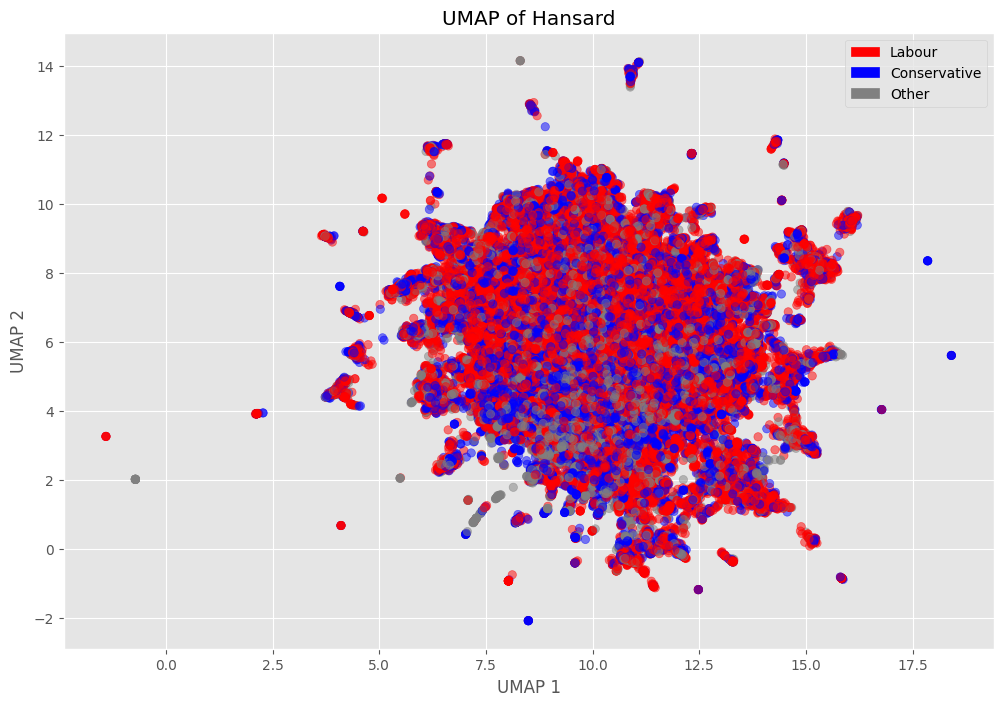

In [30]:
party_colours = {
    'Conservative': 'blue',
    'Labour': 'red',
}
default_colour = 'grey'
colours = hansard['speech_party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_hansard_embeddings[:, 0],
            umap_hansard_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Labour'),
    mpatches.Patch(color='blue', label='Conservative'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Democrat versus Labour**


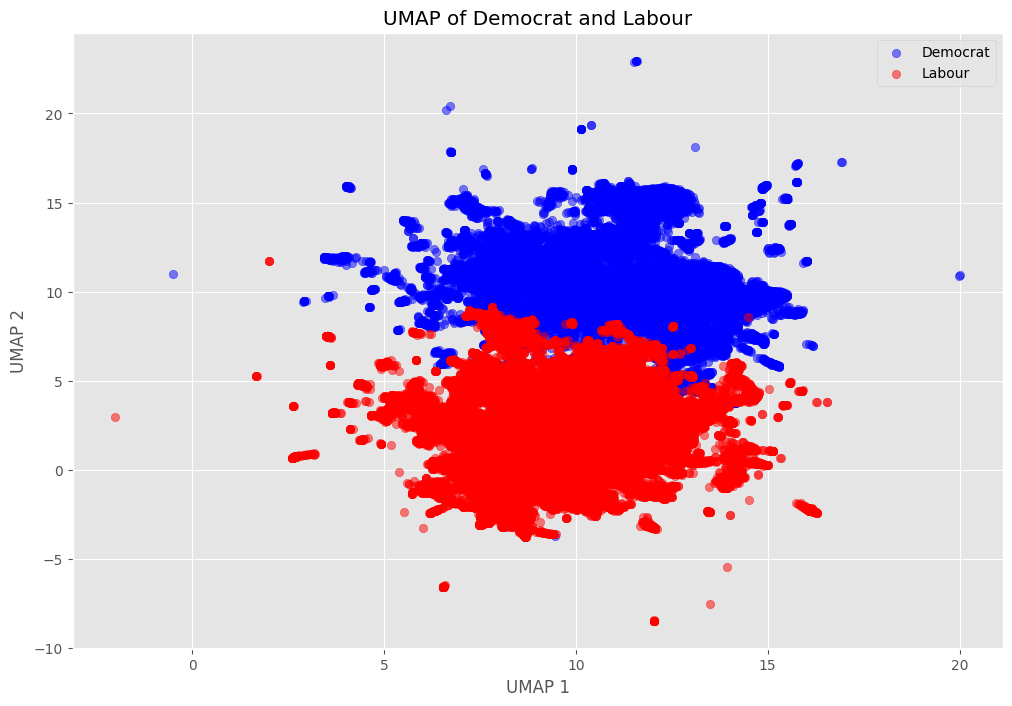

In [11]:
democrat_mask = (congressional_record['party'] == 'D')
labour_mask = (hansard['speech_party'] == 'Labour')

umap_democrat_embeddings = umap_congressional_record_embeddings[democrat_mask]
umap_labour_embeddings = umap_hansard_embeddings[labour_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_democrat_embeddings[:, 0],
            umap_democrat_embeddings[:, 1], alpha=0.5, c='blue', label='Democrat')
plt.scatter(umap_labour_embeddings[:, 0],
            umap_labour_embeddings[:, 1], alpha=0.5, c='red', label='Labour')
plt.title('UMAP of Democrat and Labour')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Republican versus Conservative**


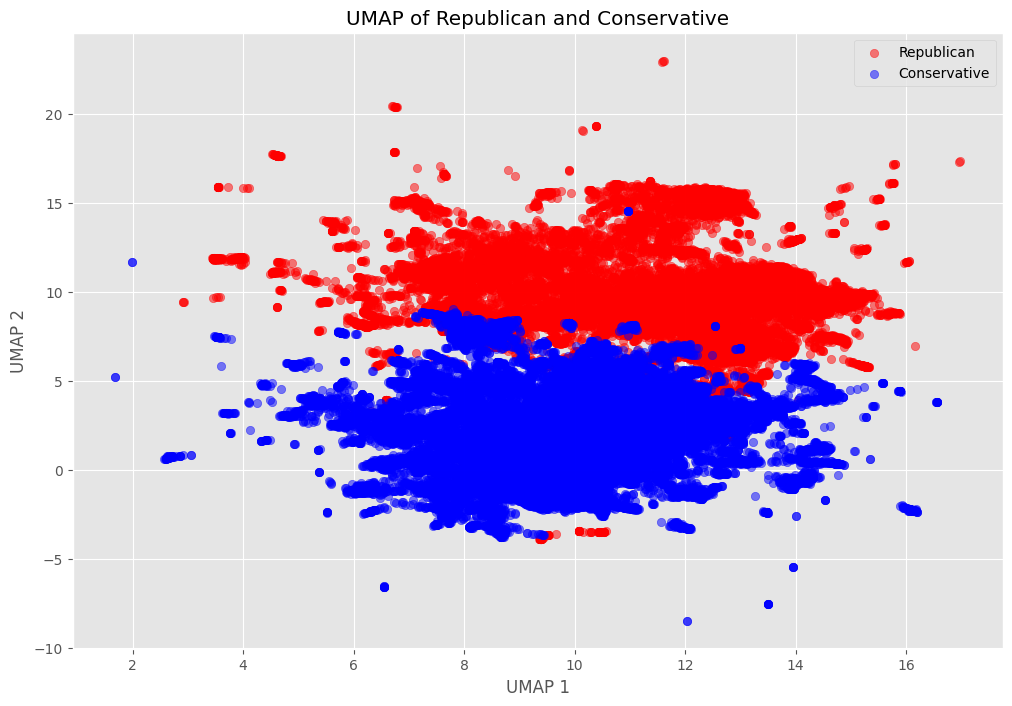

In [12]:
republican_mask = (congressional_record['party'] == 'R')
conservative_mask = (hansard['speech_party'] == 'Conservative')

umap_republican_embeddings = umap_congressional_record_embeddings[republican_mask]
umap_conservative_embeddings = umap_hansard_embeddings[conservative_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_republican_embeddings[:, 0],
            umap_republican_embeddings[:, 1], alpha=0.5, c='red', label='Republican')
plt.scatter(umap_conservative_embeddings[:, 0],
            umap_conservative_embeddings[:, 1], alpha=0.5, c='blue', label='Conservative')
plt.title('UMAP of Republican and Conservative')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

### Visualising the Climate Congressional Record and Climate Hansard embeddings


In [21]:
umap_climate_congressional_record_embeddings = umap_model.fit_transform(
    climate_congressional_record_embeddings)
umap_climate_hansard_embeddings = umap_model.fit_transform(
    climate_hansard_embeddings)

**Congressional Record versus Hansard**


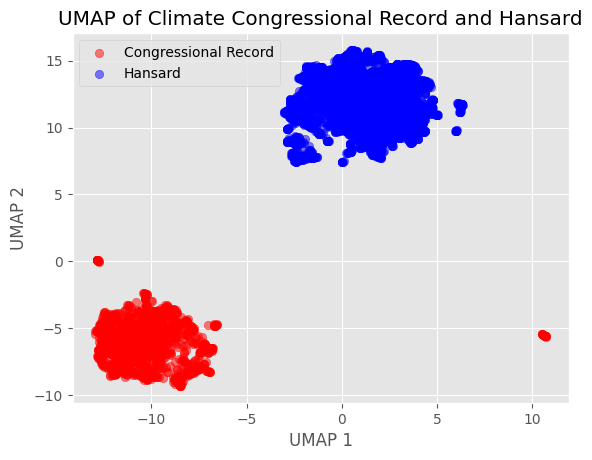

In [22]:
plt.scatter(umap_climate_congressional_record_embeddings[:, 0],
            umap_climate_congressional_record_embeddings[:, 1], alpha=0.5, c='red', label='Congressional Record')
plt.scatter(umap_climate_hansard_embeddings[:, 0],
            umap_climate_hansard_embeddings[:, 1], alpha=0.5, c='blue', label='Hansard')
plt.title('UMAP of Climate Congressional Record and Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Democrat versus Republican**


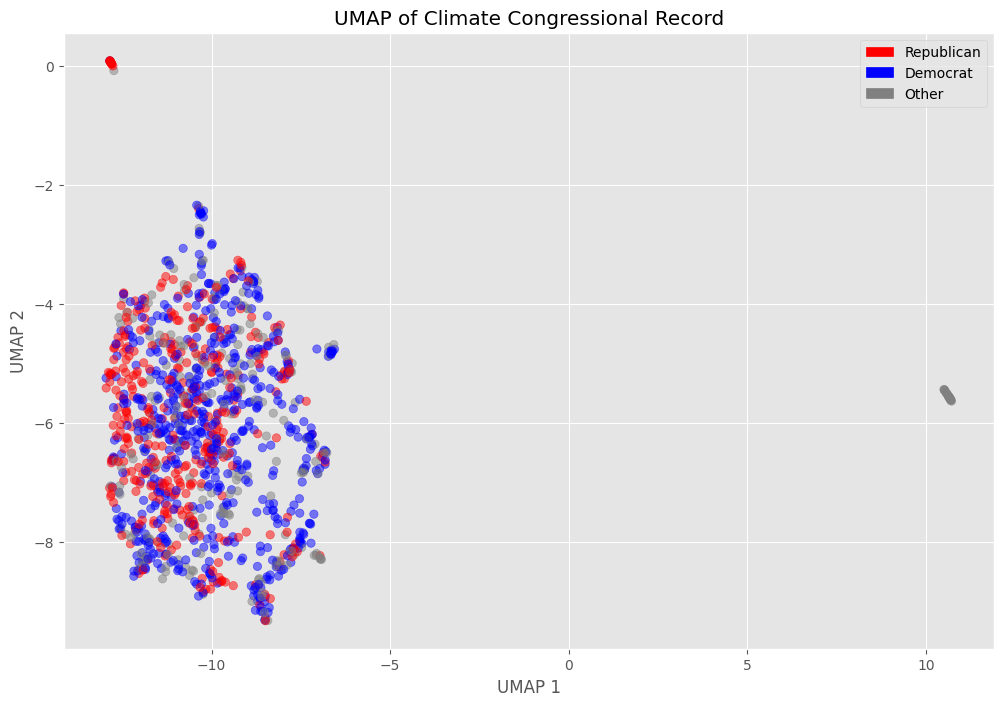

In [31]:
party_colours = {
    'R': 'red',
    'D': 'blue',
}
default_colour = 'grey'
colours = climate_congressional_record['party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_congressional_record_embeddings[:, 0],
            umap_climate_congressional_record_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Climate Congressional Record')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Republican'),
    mpatches.Patch(color='blue', label='Democrat'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Labour versus Conservative**


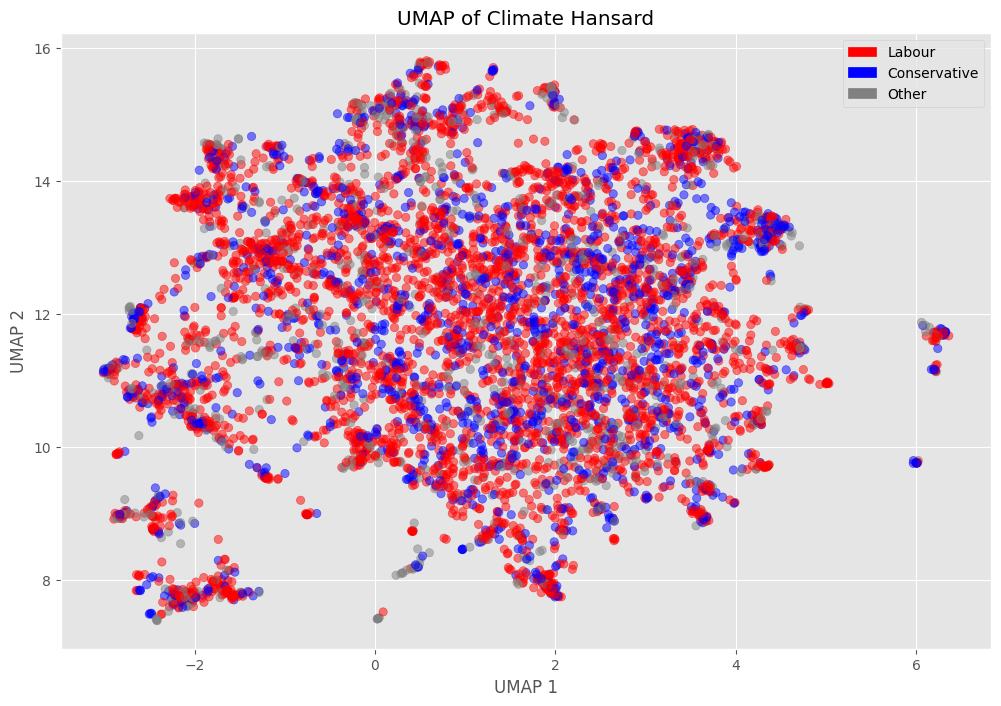

In [32]:
party_colours = {
    'Conservative': 'blue',
    'Labour': 'red',
}
default_colour = 'grey'
colours = climate_hansard['speech_party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_hansard_embeddings[:, 0],
            umap_climate_hansard_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Climate Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Labour'),
    mpatches.Patch(color='blue', label='Conservative'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Democrat versus Labour**


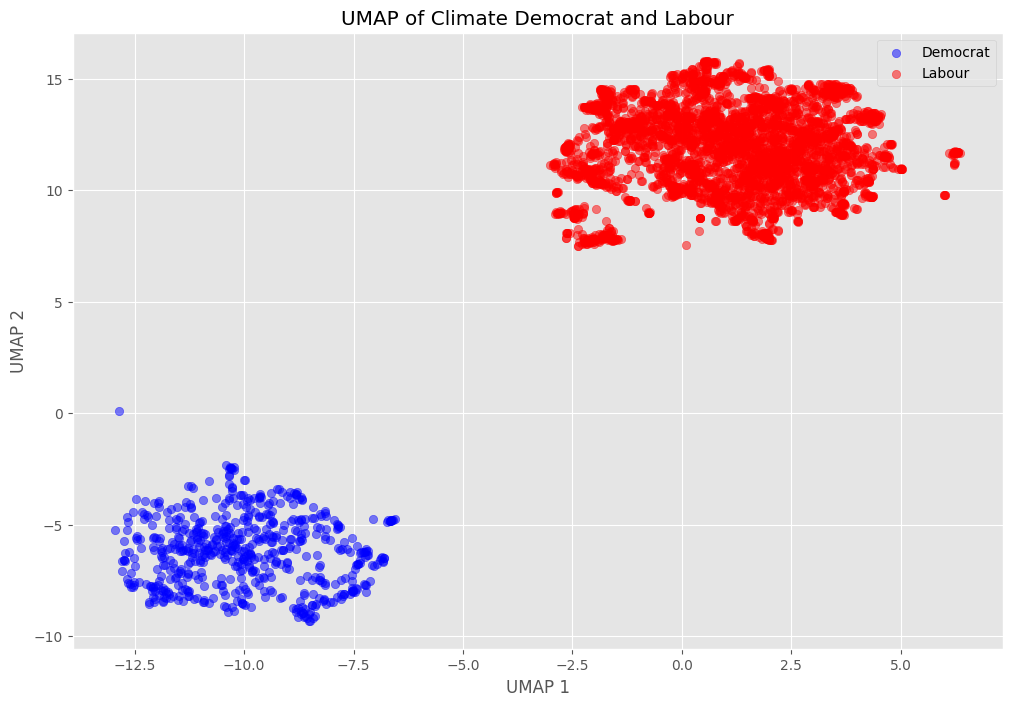

In [33]:
climate_democrat_mask = (climate_congressional_record['party'] == 'D')
climate_labour_mask = (climate_hansard['speech_party'] == 'Labour')

umap_climate_democrat_embeddings = umap_climate_congressional_record_embeddings[
    climate_democrat_mask]
umap_climate_labour_embeddings = umap_climate_hansard_embeddings[climate_labour_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_democrat_embeddings[:, 0],
            umap_climate_democrat_embeddings[:, 1], alpha=0.5, c='blue', label='Democrat')
plt.scatter(umap_climate_labour_embeddings[:, 0],
            umap_climate_labour_embeddings[:, 1], alpha=0.5, c='red', label='Labour')
plt.title('UMAP of Climate Democrat and Labour')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Republican versus Conservative**


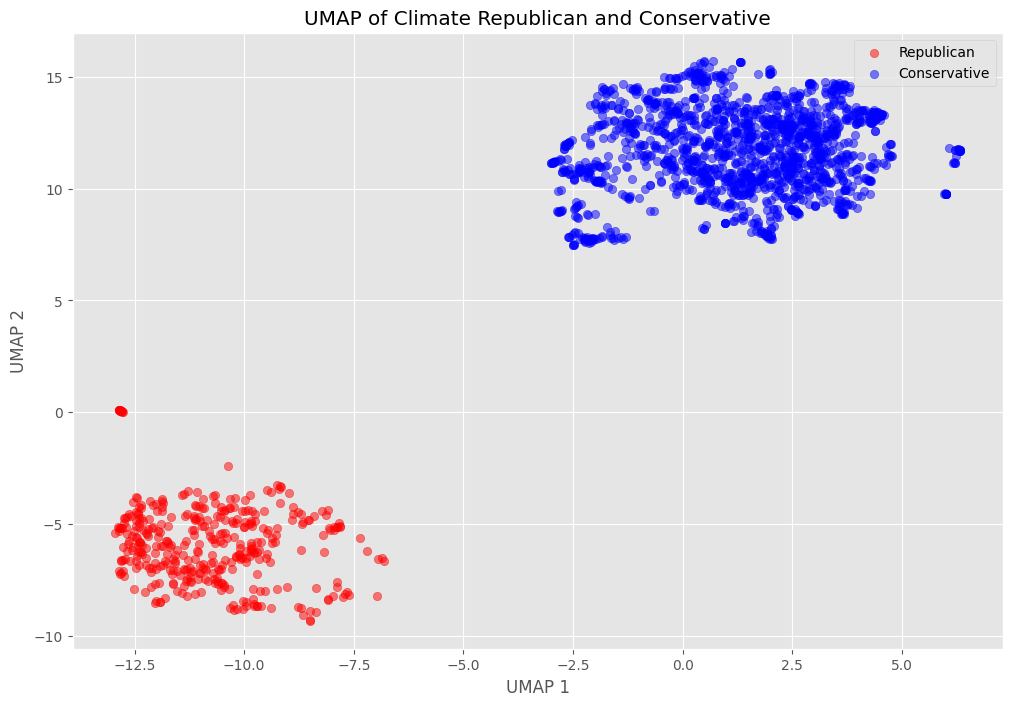

In [35]:
climate_republican_mask = (climate_congressional_record['party'] == 'R')
climate_conservative_mask = (climate_hansard['speech_party'] == 'Conservative')

umap_climate_republican_embeddings = umap_climate_congressional_record_embeddings[
    climate_republican_mask]
umap_climate_conservative_embeddings = umap_climate_hansard_embeddings[
    climate_conservative_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_republican_embeddings[:, 0],
            umap_climate_republican_embeddings[:, 1], alpha=0.5, c='red', label='Republican')
plt.scatter(umap_climate_conservative_embeddings[:, 0],
            umap_climate_conservative_embeddings[:, 1], alpha=0.5, c='blue', label='Conservative')
plt.title('UMAP of Climate Republican and Conservative')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()